In [1]:
import numpy as np
import matplotlib.pyplot as plt


def is_inside_triangle(x, y):
    return (y > 1) & (y < (-x + 8)) & (x > 0) & (x < 8)

def is_inside_cutout(x, y):
    return (x >= 3) & (x <= 5) & (y >= 1) & (y <= 3)

def find_monte_carlo_area(N, x_min, x_max, y_min, y_max,
                          is_inside, is_inside_cutout):
    
    x_rand = np.random.uniform(x_min, x_max, N)
    y_rand = np.random.uniform(y_min, y_max, N)

    inside = (is_inside(x_rand, y_rand) & 
             (~is_inside_cutout(x_rand, y_rand)))
    
    square_area = (x_max - x_min) * (y_max - y_min)
    fraction = np.sum(inside) / N
    area_estimate = square_area * fraction

    return area_estimate, x_rand, y_rand, inside


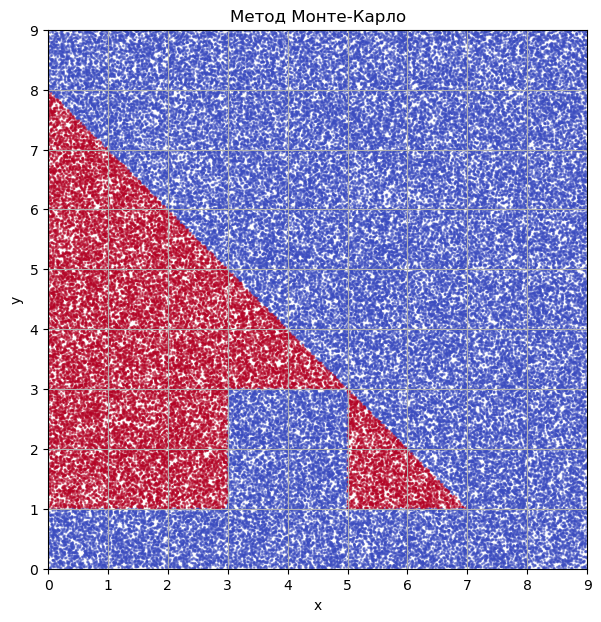

Теоретическая площадь: 20.5
Оцененная площадь (Монте-Карло): 20.5805
Кол-во итераций: 100000
Относительная ошибка: 0.3926%


In [2]:

N = int(1e5)
x_min, x_max = 0, 9
y_min, y_max = 0, 9

(S_mk, x_r, y_r, 
 inside_pts) = find_monte_carlo_area(N, x_min, x_max, 
                                     y_min, y_max,
                                     is_inside_triangle,
                                     is_inside_cutout)

plt.figure(figsize=(7, 7))
plt.scatter(x_r, y_r, c=inside_pts, cmap='coolwarm', 
            s=1, alpha=0.5)
plt.title('Метод Монте-Карло')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

S_triangle = 7 * 7 / 2
S_cutout = 2 * 2
S_true = S_triangle - S_cutout

print(f'Теоретическая площадь: {S_true}')
print(f'Оцененная площадь (Монте-Карло): {S_mk:.4f}')
print(f'Кол-во итераций: {N}')
print(f'Относительная ошибка: {abs(S_mk - S_true)
                               / S_true * 100:.4f}%')


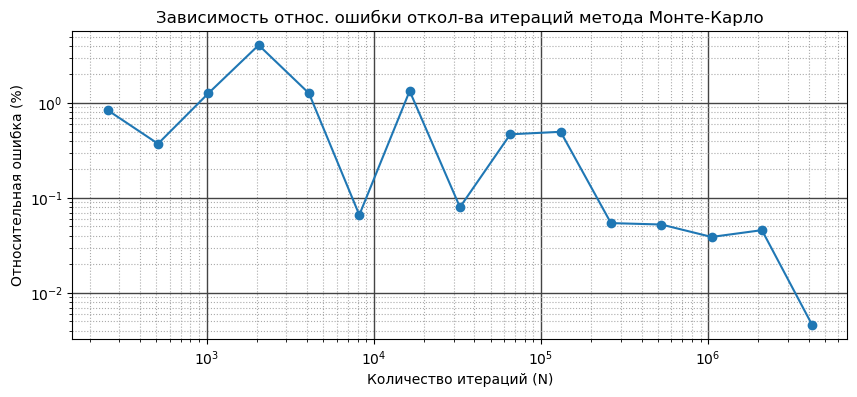

In [3]:

def find_monte_carlo_P(N, is_inside, 
                       is_inside_cutout):
    
    x_rand = np.random.uniform(0, 7, N)
    y_rand = np.random.uniform(1, 8, N)

    inside = (is_inside(x_rand, y_rand) &
              ~is_inside_cutout(x_rand, y_rand))

    P = np.sum(inside)
    return P

N_values = [2**i for i in range(8, 23)]
epsilons = []

for N in N_values:
    P = find_monte_carlo_P(N, is_inside_triangle,
                           is_inside_cutout)

    S_N = P / N * 49
    epsilon = abs(S_N - S_true) / S_true * 100
    epsilons.append(epsilon)

plt.figure(figsize=(10, 4)) 
plt.plot(N_values, epsilons, marker='o') 
plt.xscale('log') 
plt.yscale('log') 
plt.xlabel('Количество итераций (N)') 
plt.ylabel('Относительная ошибка (%)')

plt.title('Зависимость относ. ошибки от'
          'кол-ва итераций метода Монте-Карло')

plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1) 
plt.grid(which='minor', color='#aaa', ls=':') 
plt.show()


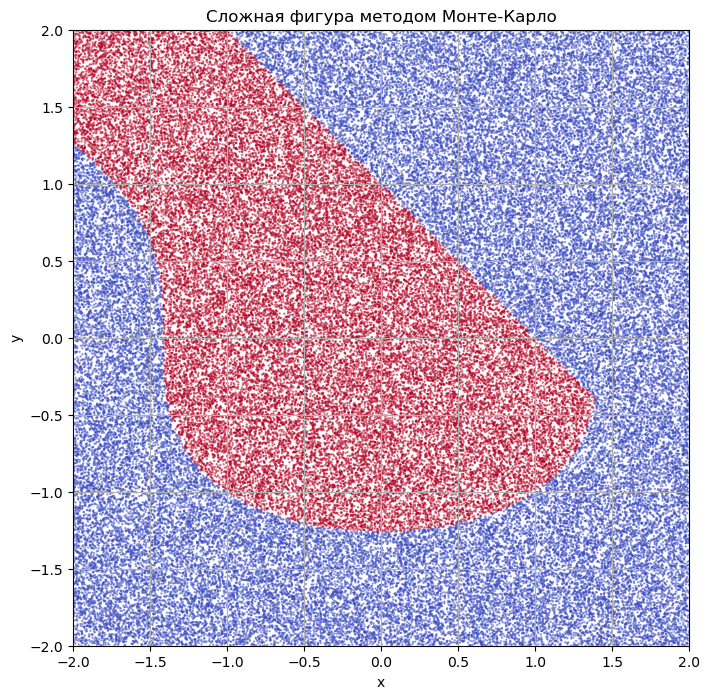

Теоретическая площадь: 6.37517
Оцененная площадь (Монте-Карло): 6.3710
Кол-во итераций: 100000
Относительная ошибка: 0.0648%


In [4]:

N = 10**5

x_min, x_max = -2, 2
y_min, y_max = -2, 2

def is_inside(x, y):
    return (x**2 - y**3 < 2) & (x + y < 1)

def find_monte_carlo_complex_area(N, x_min, x_max, 
                                  y_min, y_max,
                                  is_inside):
    
    x_rand = np.random.uniform(x_min, x_max, N)
    y_rand = np.random.uniform(y_min, y_max, N)
    
    inside = is_inside(x_rand, y_rand)
    area_rectangle = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_rectangle * np.sum(inside) / N
    
    return area_estimate, x_rand, y_rand, inside

(S_mk, x_rand, y_rand, 
 inside) = find_monte_carlo_complex_area(N,
                                         x_min, x_max, 
                                         y_min, y_max,
                                         is_inside)

S_true = 6.37517

plt.figure(figsize=(8, 8))
plt.scatter(x_rand, y_rand, c=inside, cmap='coolwarm', 
            s=0.5, alpha=0.5)
plt.title('Сложная фигура методом Монте-Карло')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

print(f'Теоретическая площадь: {S_true}')
print(f'Оцененная площадь (Монте-Карло): {S_mk:.4f}')
print(f'Кол-во итераций: {N}')
print(f'Относительная ошибка: {abs(S_mk - S_true)/
                               S_true * 100:.4f}%')
